In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor 
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
import matplotlib.pyplot as plt

In [2]:
labels=['Open','High','Low','Volume','OpenInt']

In [3]:
ip = pd.read_csv("Downloads/Stock.csv")

In [4]:
ip

,Date,Open,High,Low,Close,Volume,OpenInt
0,18-11-1999,30.713,33.754,27.002,29.702,66277506,0
1,19-11-1999,28.986,29.027,26.872,27.257,16142920,0
2,22-11-1999,27.886,29.702,27.044,29.702,6970266,0
3,23-11-1999,28.688,29.446,27.002,27.002,6332082,0
4,24-11-1999,27.083,28.309,27.002,27.717,5132147,0
...,...,...,...,...,...,...,...
4516,06-11-2017,68.220,68.450,68.220,68.220,995731,0
4517,07-11-2017,68.320,68.640,68.040,68.250,966466,0
4518,08-11-2017,68.100,68.330,67.771,68.110,972616,0
4519,09-11-2017,67.920,67.980,66.910,67.470,1673083,0


In [22]:
X=ip.drop('Close',axis=1).drop('Date',axis=1)
y=ip['Close']

In [23]:
X

,Open,High,Low,Volume,OpenInt
0,30.713,33.754,27.002,66277506,0
1,28.986,29.027,26.872,16142920,0
2,27.886,29.702,27.044,6970266,0
3,28.688,29.446,27.002,6332082,0
4,27.083,28.309,27.002,5132147,0
...,...,...,...,...,...
4516,68.220,68.450,68.220,995731,0
4517,68.320,68.640,68.040,966466,0
4518,68.100,68.330,67.771,972616,0
4519,67.920,67.980,66.910,1673083,0


In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
print(scaler.fit(X))
X=scaler.transform(X)

MinMaxScaler(copy=True, feature_range=(0, 1))


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10,random_state=99)

In [26]:
regressor = RandomForestRegressor(n_estimators = 1000, random_state=0, n_jobs=-1) 

In [27]:
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [28]:
pred = regressor.predict(X_test)

In [29]:
pred

array([56.021769 , 21.541805 , 13.443327 , 36.753888 , 41.166571 ,
       25.778645 , 30.590961 , 46.287586 , 23.155729 , 13.979983 ,
       46.212775 , 32.668994 , 20.94174  , 26.277357 , 20.882701 ,
       19.99982  , 14.574505 , 39.145559 , 39.126572 , 19.416646 ,
       21.823275 , 22.943768 , 24.819604 ,  9.5519906, 12.701464 ,
       27.70435  , 38.407082 , 12.685826 , 46.060911 , 14.801229 ,
       50.643158 , 24.016694 , 16.714047 , 40.704411 , 24.345721 ,
       42.074077 , 18.011336 , 30.305333 , 24.936035 , 21.123389 ,
       23.530979 , 39.393764 , 44.879836 , 51.359    , 31.585177 ,
       25.607918 , 26.229938 , 20.793904 , 25.453558 , 17.729057 ,
       40.531873 , 40.901495 , 39.546076 , 34.792935 , 45.537123 ,
       24.469327 , 16.094033 , 31.962145 , 25.122878 , 41.50195  ,
       23.98024  , 20.102747 , 44.334757 , 10.927044 , 14.709626 ,
       16.601141 , 18.895425 , 19.933994 , 22.234613 , 23.246478 ,
       24.414534 , 21.377923 , 17.319778 , 24.002516 , 13.1513

In [30]:
test_set_rmse=(np.sqrt(mean_squared_error(y_test,pred)))
test_set_r2=r2_score(y_test,pred)
test_set_mae=mean_absolute_error(y_test,pred)
print(test_set_rmse)
print(test_set_r2)
print(test_set_mae)

0.504236375278368
0.9984667805724955
0.23058035165562643


In [31]:
for feature in zip(labels, regressor.feature_importances_):
    print(feature)

('Open', 0.005267173017799897)
('High', 0.23018638362242302)
('Low', 0.7642968711574882)
('Volume', 0.0002495722022888333)
('OpenInt', 0.0)


In [32]:
y_test

4394    56.459
1701    21.710
668     13.325
4007    36.940
3839    41.084
         ...  
2723    20.630
52      52.485
863     10.849
2586    22.722
935     15.162
Name: Close, Length: 453, dtype: float64

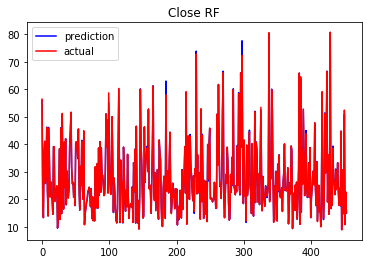

In [33]:
x=np.arange(0,453)
plt.title('Close RF')
plt.plot(x,pred,'b-',label='prediction')
plt.plot(x,y_test,'r-',label='actual')
plt.legend()
plt.show()

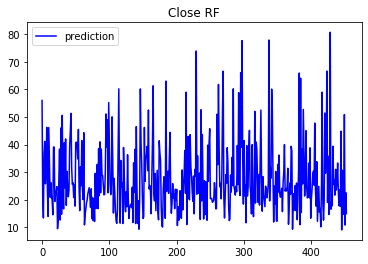

In [34]:
x=np.arange(0,453)
plt.title('Close RF')
plt.plot(x,pred,'b-',label='prediction')
plt.legend()
plt.show()

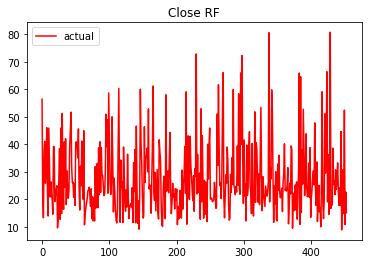

In [35]:
x=np.arange(0,453)
plt.title('Close RF')
plt.plot(x,y_test,'r-',label='actual')
plt.legend()
plt.show()